In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
data = scipy.io.loadmat("resources/ex8_movies.mat")
y = data["Y"] #rating given by the user j to movie i
r = data["R"] #movies rated by the user

In [3]:
params = scipy.io.loadmat("resources/ex8_movieParams.mat")
X = params["X"]
Theta = params["Theta"]

In [4]:
y.shape

(1682, 943)

Text(0, 0.5, 'Movies')

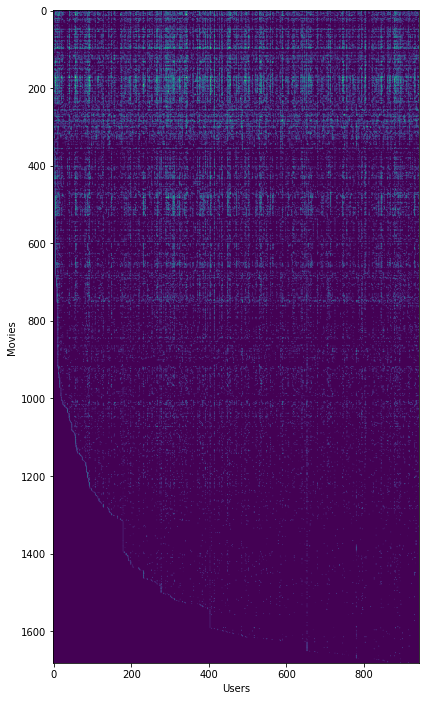

In [5]:
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(y)
ax.set_xlabel("Users")
ax.set_ylabel("Movies")

In [6]:
u = y[0].shape[0] #number of users
u

943

In [7]:
m = y.shape[0] #number of movies
m

1682

In [8]:
# movie i rated by the number of users j
#showing first 10 movies
for j in range(m):
    temp = np.where(r[j] == 1)
    if j < 10:
        print(f"movie {j+1} rated by the number of users:", r[j,temp].shape[1])


movie 1 rated by the number of users: 452
movie 2 rated by the number of users: 131
movie 3 rated by the number of users: 90
movie 4 rated by the number of users: 209
movie 5 rated by the number of users: 86
movie 6 rated by the number of users: 26
movie 7 rated by the number of users: 392
movie 8 rated by the number of users: 219
movie 9 rated by the number of users: 299
movie 10 rated by the number of users: 89


In [9]:
# number of features 
n = 3
Lambda = 1.5

In [10]:
#feature and parameters initialization
np.random.seed(0)
x = np.random.rand(m, n)
theta = np.random.rand(u, n)

In [11]:
print("initial features :" ,x)
print("initial parameters :", theta)


initial features : [[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 ...
 [0.63662475 0.12374333 0.56514734]
 [0.09774871 0.5470768  0.15891889]
 [0.11901355 0.11310006 0.91102531]]
initial parameters : [[5.98087317e-01 2.50158722e-01 7.14488780e-02]
 [5.36181419e-01 1.44802971e-01 7.78402934e-01]
 [4.96109657e-01 7.26448885e-01 3.95726599e-01]
 ...
 [6.03854208e-01 6.06234132e-01 6.49907629e-01]
 [1.78911865e-03 3.69958404e-01 3.29278822e-01]
 [9.77933189e-01 7.26699028e-04 7.36344717e-01]]


In [12]:
def cost(x , theta, y , Lambda, r):
    error = (np.matmul(x ,theta.T) - y )  # (1682, 943)
    squared_error = np.square(error * r)  
    J =  (1 / (2)) * np.sum(squared_error)+ ((Lambda/(2)) * np.sum(np.square(theta))) + ((Lambda/(2)) * np.sum(np.square(x)))
    return J

In [13]:
def grad(x, theta, y, Lambda,r):
    gradx = (np.matmul(((np.matmul(x ,theta.T) - y )* r),theta)) + (Lambda * x) # mxn . nxu = mxu - mxu = mxu.uxn = mxn
    gradO = (np.matmul(((np.matmul(x , theta.T) - y)* r).T , x)) + (Lambda * theta) #mxn.nxu = mxu - mxu = uxm.mxn =uxn
    return gradx , gradO

In [14]:
def COST(params, Y, R, num_features, Lambda):  
    Y = np.matrix(Y)  # (1682, 943)
    R = np.matrix(R)  # (1682, 943)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    # reshape the parameter array into parameter matrices
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  # (1682, 10)
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  # (943, 10)
    # initializations
    J = 0
    X_grad = np.zeros(X.shape)  # (1682, 10)
    Theta_grad = np.zeros(Theta.shape)  # (943, 10)
    # compute the cost
    error = np.multiply((X * Theta.T) - Y, R)  # (1682, 943)
    squared_error = np.power(error, 2)  # (1682, 943)
    J = (1. / 2) * np.sum(squared_error)
    # add the cost regularization
    J = J + ((Lambda / 2) * np.sum(np.power(Theta, 2)))
    J = J + ((Lambda / 2) * np.sum(np.power(X, 2)))
    # calculate the gradients with regularization
    X_grad = (error * Theta) + (Lambda * X)
    Theta_grad = (error.T * X) + (Lambda * Theta)
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    return J, grad

In [15]:
initial_cost = cost(x, theta, y , Lambda , r )
initial_cost

462542.64423150645

In [16]:
#testing with preprovided params data
users = 4  
movies = 5  
features = 3

X_sub = X[:movies, :features]  
Theta_sub = Theta[:users, :features]  
Y_sub = y[:movies, :users]  
R_sub = r[:movies, :users]
# params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))
cost(X_sub, Theta_sub, Y_sub,Lambda,R_sub)

31.34405624427422

In [17]:
#with regularisation
cost(X_sub, Theta_sub, Y_sub,Lambda = 1.5,r = R_sub)

31.34405624427422

In [18]:
#testing gradient
grad(X_sub,Theta_sub,Y_sub,Lambda = 1.5 , r = R_sub)

(array([[-0.95596339,  6.97535514, -0.10861109],
        [ 0.60308088,  2.77421145,  0.25839822],
        [ 0.12985616,  4.0898522 , -0.89247334],
        [ 0.29684395,  1.06300933,  0.66738144],
        [ 0.60252677,  4.90185327, -0.19747928]]),
 array([[-10.13985478,   2.10136256,  -6.76563628],
        [ -2.29347024,   0.48244098,  -2.99791422],
        [ -0.64787484,  -0.71820673,   1.27006666],
        [  1.09289758,  -0.40784086,   0.49026541]]))

In [19]:
params = np.concatenate((np.ravel(x), np.ravel(theta)))
fmin = minimize(fun=COST, x0=params, args=(y, r, n, Lambda),  
                method='CG', jac=True, options={'maxiter': 100})
fmin

     fun: 41954.41576594438
     jac: array([-3.60692283, -3.93634617, -3.46914317, ...,  0.11048713,
       -0.46642203,  0.01566364])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 149
     nit: 100
    njev: 149
  status: 1
 success: False
       x: array([1.36498641, 1.10014823, 0.88788667, ..., 0.57562045, 1.98762437,
       0.9829018 ])

In [20]:
X = np.array(np.reshape(fmin.x[:m * n], (m, n)))  
Theta = np.array(np.reshape(fmin.x[m * n:], (u, n)))
X.shape, Theta.shape

((1682, 3), (943, 3))

In [21]:
movies = open("resources/movie_ids.txt", "r")
movies_list = []

for line in movies:
    line = line.rstrip()
    line = line.split(maxsplit=1)
    movies_list.append(line[1:])
movies_list[:10] #first 10 movies in the list

[['Toy Story (1995)'],
 ['GoldenEye (1995)'],
 ['Four Rooms (1995)'],
 ['Get Shorty (1995)'],
 ['Copycat (1995)'],
 ['Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)'],
 ['Twelve Monkeys (1995)'],
 ['Babe (1995)'],
 ['Dead Man Walking (1995)'],
 ['Richard III (1995)']]

lets recommend movies i to User j which he has not seen.


In [26]:
def moviesrated(X,Theta,User , movies_list):
    
    
    ratings_by_user = np.dot(X , Theta[User].T)
    
    for i,j in zip(ratings_by_user,movies_list):
        print("Movie:",j[0], "is rated: ", int(np.floor(i.item())),"stars")
    

In [27]:
# moviesrated(X,Theta,User = 2, movies_list = movies_list)

In [28]:
def movies_recommendation(X,Theta,User , movies_list,r, nmovies):
    idx = np.where(r[:,User] == 0)
    movies = np.array(movies_list)
    ratings_by_user = np.dot(X[idx] , Theta[User].T)   
    my_movies = movies[idx]
    count  = 0
    for i,j in zip(ratings_by_user,my_movies):
        print("Movie:",j[0], "is rated: ", round(i.item()),"stars")
        count += 1
        if count == nmovies:break
    return my_movies , ratings_by_user.reshape(my_movies.shape)
        

In [29]:
my_movies , ratings = movies_recommendation(X,Theta,User =50 , movies_list = movies_list,r = r, nmovies=20)

Movie: Toy Story (1995) is rated:  4 stars
Movie: GoldenEye (1995) is rated:  4 stars
Movie: Four Rooms (1995) is rated:  4 stars
Movie: Get Shorty (1995) is rated:  3 stars
Movie: Copycat (1995) is rated:  3 stars
Movie: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) is rated:  3 stars
Movie: Twelve Monkeys (1995) is rated:  4 stars
Movie: Babe (1995) is rated:  3 stars
Movie: Dead Man Walking (1995) is rated:  3 stars
Movie: Richard III (1995) is rated:  3 stars
Movie: Seven (Se7en) (1995) is rated:  4 stars
Movie: Usual Suspects, The (1995) is rated:  4 stars
Movie: Mighty Aphrodite (1995) is rated:  2 stars
Movie: Postino, Il (1994) is rated:  2 stars
Movie: Mr. Holland's Opus (1995) is rated:  3 stars
Movie: French Twist (Gazon maudit) (1995) is rated:  3 stars
Movie: From Dusk Till Dawn (1996) is rated:  4 stars
Movie: White Balloon, The (1995) is rated:  2 stars
Movie: Antonia's Line (1995) is rated:  2 stars
Movie: Angels and Insects (1995) is rated:  1 stars


In [30]:
ratings = np.ravel(ratings)
my_movies = np.ravel(my_movies)

In [31]:
sorted_ratings_idx = np.argsort(ratings)
reverse_idx = sorted_ratings_idx[::-1]
ratings = ratings[reverse_idx]
my_movies = my_movies[reverse_idx]

In [32]:
print("Top ten recommendation for User 50: \n")
count = 0
for i , j in zip(my_movies,ratings):
    print(i,round(j))
    count +=1
    if count == 10: break

Top ten recommendation for User 50: 

Die xue shuang xiong (Killer, The) (1989) 5.0
Prophecy, The (1995) 5.0
Sum of Us, The (1994) 4.0
Love & Human Remains (1993) 4.0
Terminator 2: Judgment Day (1991) 4.0
Bitter Moon (1992) 4.0
Man in the Iron Mask, The (1998) 4.0
My Man Godfrey (1936) 4.0
Deceiver (1997) 4.0
Con Air (1997) 4.0
